In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard
%matplotlib inline

    

Tensorflow version: 2.16.0-rc0


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 164)                 │             328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 164)                 │          27,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 164)                 │          27,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 164)                 │          27,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 164)                 │          27,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 164)                 │          27,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,795 (530.45 KB)

 Trainable params: 135,795 (530.45 KB)

 Non-trainable params: 0 (0.00 B)

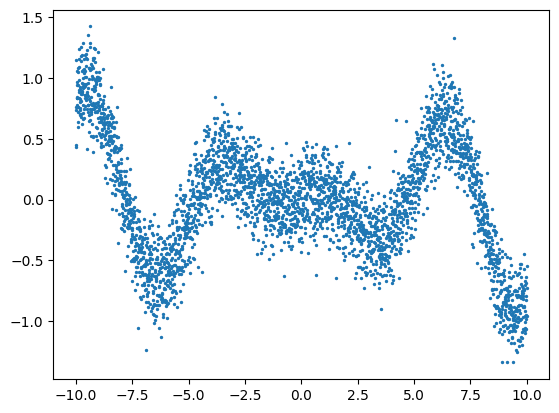

In [9]:
from datetime import datetime
from packaging import version


from tensorflow import keras



import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

print(f'Tensorflow version: {tf.__version__}')



x_data = np.linspace(-10, 10, num=10000)
y_data = 0.1*x_data*np.cos(x_data) + 0.2*np.random.normal(size=10000)

plt.scatter(x_data[::3], y_data[::3], s=2)


model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 1, input_shape=([1]), activation = 'linear'),
  tf.keras.layers.Dense(units = 164, activation = 'relu'),
  tf.keras.layers.Dense(units = 164, activation = 'relu'),
  tf.keras.layers.Dense(units = 164, activation = 'relu'),
  tf.keras.layers.Dense(units = 164, activation = 'relu'),
  tf.keras.layers.Dense(units = 164, activation = 'relu'),
  tf.keras.layers.Dense(units = 164, activation = 'relu'),
  tf.keras.layers.Dense(1)               
])

model.compile(optimizer="adam", loss='mse',metrics=['accuracy'])
model.summary()



#model.fit( x_data, y_data, epochs=100)



In [10]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model.fit(
    x_data,
    y_data, 
    batch_size=64,
    epochs=50, 
    callbacks=[tensorboard_callback])


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1991
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0607
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0495
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0480
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0491
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0494
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0455
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0488
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0480
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0441
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0450
Epoch 12

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


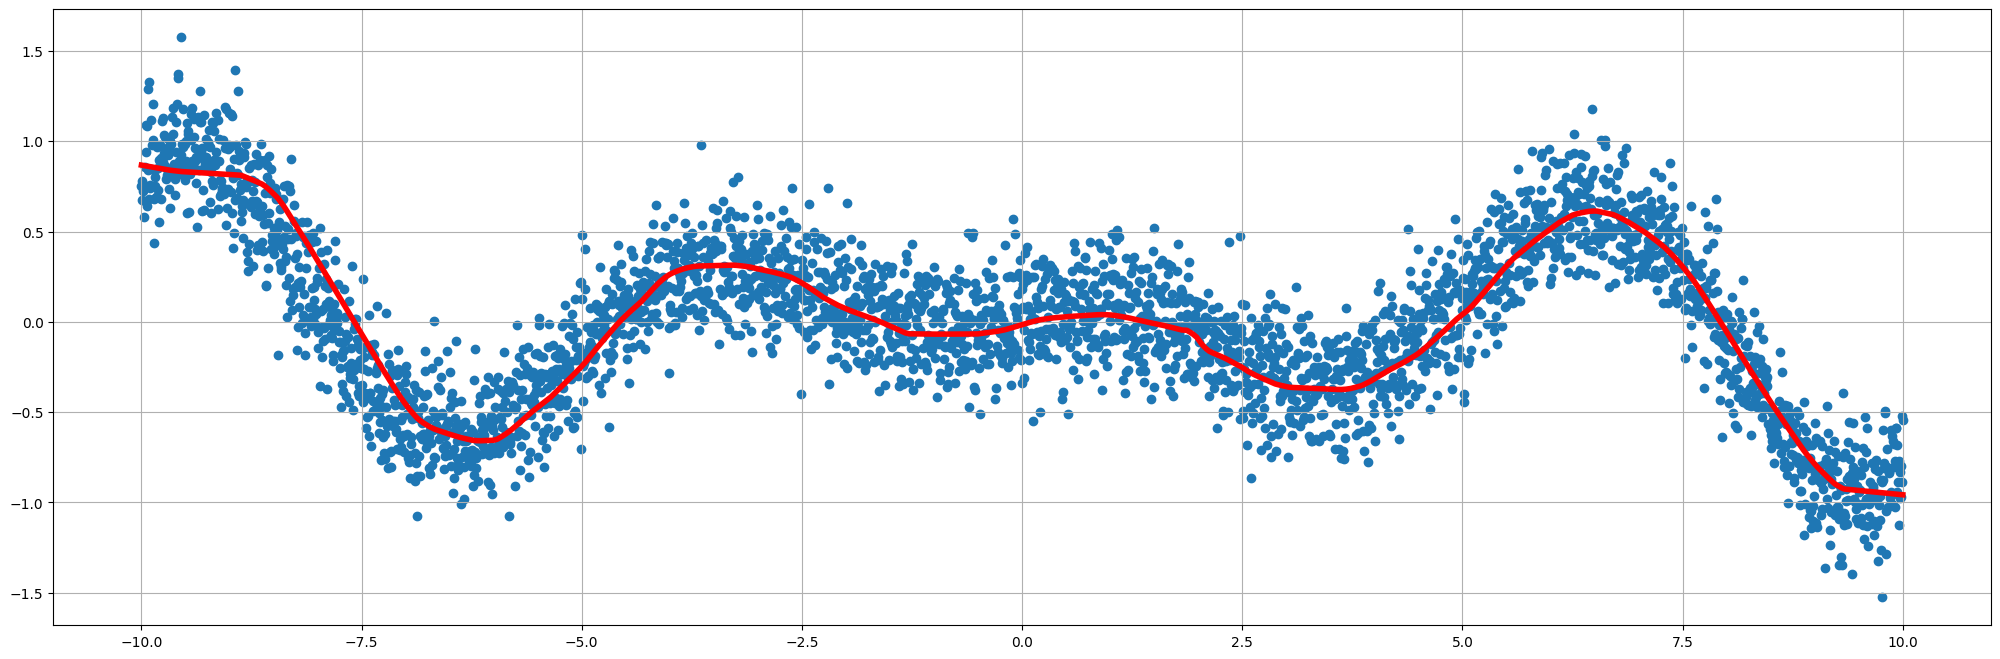

In [7]:
y_predicted = model.predict(x_data)

fig, ax = plt.subplots(figsize=(25,8))
plt.scatter(x_data[::3], y_data[::3])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

In [8]:
%tensorboard --logdir logs